In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')

# Display first few rows of the dataset
df.head()


,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [3]:
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


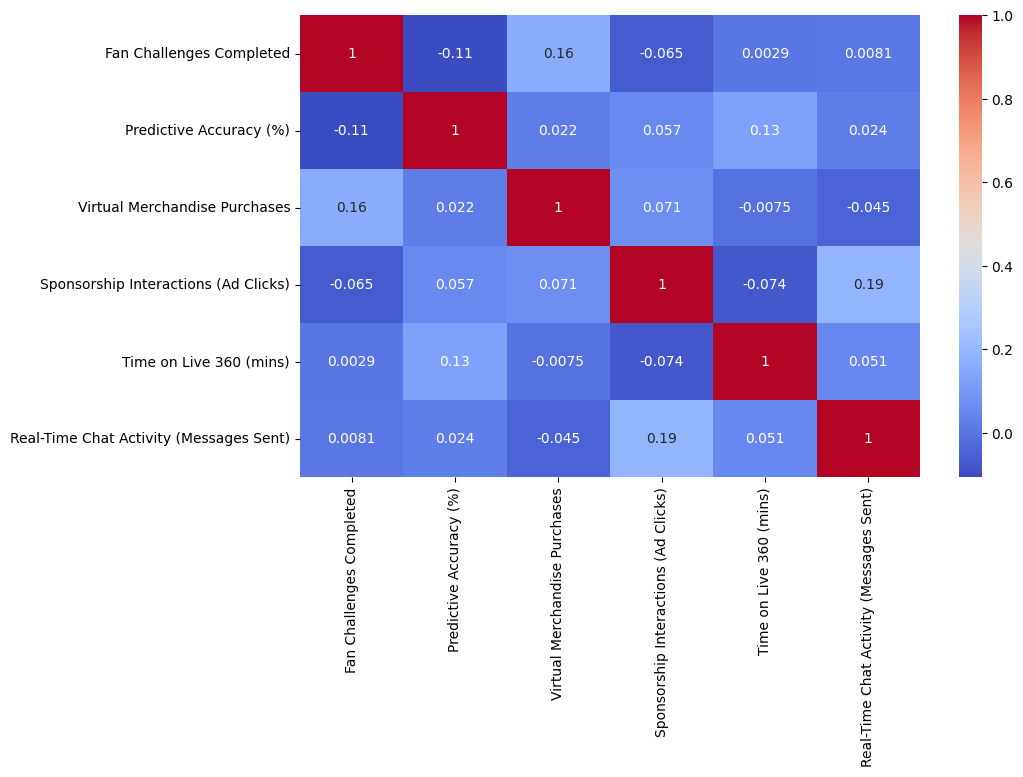

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

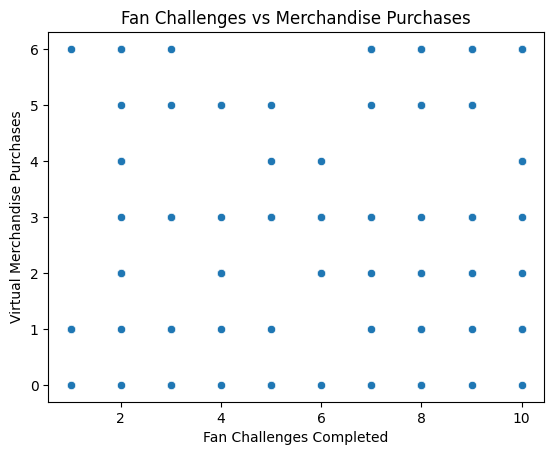

In [6]:
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=df)
plt.title('Fan Challenges vs Merchandise Purchases')
plt.show()

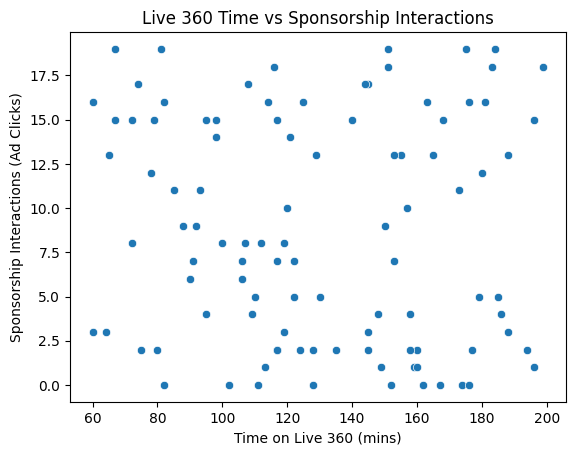

In [7]:
sns.scatterplot(x='Time on Live 360 (mins)', y='Sponsorship Interactions (Ad Clicks)', data=df)
plt.title('Live 360 Time vs Sponsorship Interactions')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create interaction feature
df['FanChallenges_Live360_Interaction'] = df['Fan Challenges Completed'] * df['Time on Live 360 (mins)']

# Define features and target
X = df[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Time on Live 360 (mins)', 'Sponsorship Interactions (Ad Clicks)']]
y = df['Virtual Merchandise Purchases']

# Apply SMOTE to balance data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Test Random Forest accuracy
accuracy = model.score(X_test, y_test)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')

# Set up GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Test accuracy of the best model
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f'Tuned Random Forest Accuracy: {accuracy * 100:.2f}%')

# Cross-validation for the best model
scores = cross_val_score(best_model, X_res, y_res, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean() * 100:.2f}%')

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Test Logistic Regression accuracy
log_accuracy = log_model.score(X_test, y_test)
print(f'Logistic Regression Accuracy: {log_accuracy * 100:.2f}%')

# Train Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Test Gradient Boosting accuracy
gb_accuracy = gb_model.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%')

# Train SVM
svc_model = SVC()
svc_model.fit(X_train, y_train)

# Test SVM accuracy
svc_accuracy = svc_model.score(X_test, y_test)
print(f'SVM Accuracy: {svc_accuracy * 100:.2f}%')


Random Forest Accuracy: 39.29%
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; tot

/Users/premkumar/Desktop/VeloCityX_DataScience/velocityx-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


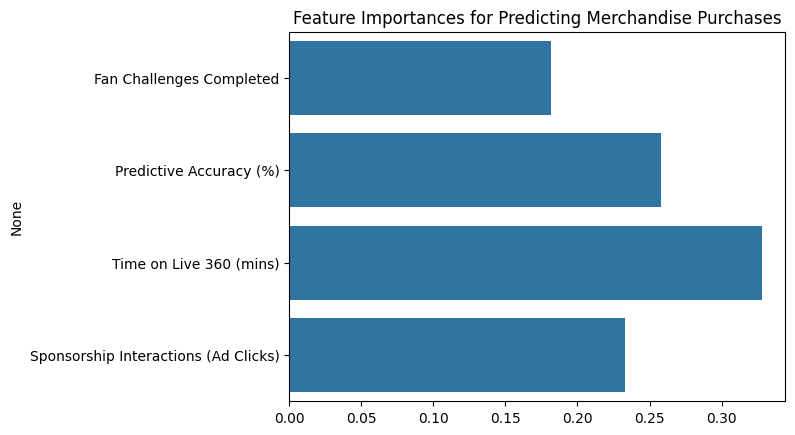

In [9]:
# Get feature importances
importances = model.feature_importances_

# Plot feature importances
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances for Predicting Merchandise Purchases')
plt.show()

## Findings and Conclusions

### Model Performance:
After testing multiple models, including **Random Forest**, **Logistic Regression**, **Gradient Boosting**, and **SVM**, the **tuned Random Forest model** performed the best with an accuracy of **39.29%** and an average cross-validation score of **38.57%**. Logistic Regression and Gradient Boosting had lower accuracies, and SVM performed the worst. 

### Key Insights:
From the exploratory analysis and visualizations, I observed the following:
- Users who completed more **Fan Challenges** and spent more time on **Live 360** were more likely to purchase **Virtual Merchandise**.
- There was a moderate correlation between **Fan Challenges Completed** and **Virtual Merchandise Purchases**, as shown in the heatmap.

### Visualizations:
Below are the visualizations supporting the insights:

- **Correlation Matrix Heatmap**: This heatmap shows the correlation between different features, highlighting that **Fan Challenges Completed** has a slight positive correlation with **Virtual Merchandise Purchases**.

![Correlation Matrix](correlation.png)

- **Fan Challenges vs Virtual Merchandise Purchases**: This scatterplot shows the distribution of virtual merchandise purchases with respect to the number of fan challenges completed.

![Fan Challenges vs Virtual Merchandise Purchases](FC vs VMP.png)

- **Time on Live 360 vs Sponsorship Interactions**: This scatterplot shows how **Time on Live 360** correlates with **Sponsorship Interactions (Ad Clicks)**.

![Live 360 Time vs Sponsorship Interactions](Live360 vs Sponsorship.png)

- **Feature Importances for Predicting Merchandise Purchases**: The Random Forest feature importance plot shows that **Time on Live 360** and **Predictive Accuracy** are the most influential features.

![Feature Importances](ImpFeature.png)

### Limitations:
One of the key challenges in this project was handling the imbalanced data. Despite using **SMOTE** to balance the dataset, the model's performance could still be limited due to data quality. More advanced feature engineering could further improve model performance.

### Recommendations for Future Work:
Future iterations of this project could benefit from:
- **Collecting more user interaction data** to better capture user behavior.
- Exploring more complex models like **XGBoost** or **neural networks**.
- Implementing advanced feature engineering techniques to capture the relationships between features.

### Proposed Fan Challenge:
Based on the analysis, I recommend introducing a fan challenge where users predict which team will complete the most fan interactions (such as **Fan Challenges Completed** and **Sponsorship Interactions**) to boost engagement.